# **Contexto**

Uma empresa do ramo de e-commerce solicitou um levantamento sobre os indicadores de recência, frequência e ticket médio (RFM) dos seus clientes.

A saber RFM:

- R (Recency): Tempo que o cliente realizou a última compra (em dias)
- F (Frequency): Quantidade de compras realizadas pelo cliente
- M (Monetary): Valor do ticket médio gasto pelo cliente

Ticket médio = média do total gasto por pedido para cada cliente.

Para isso,a empresa disponiblizou uma base de dados (arquivo csv). Inicialmente, foi identificado o Python como ferramenta de utilização, gerando um output seguro e satisfatório para o cliente. Para a segurança da empresa, o arquivo será nomeado contendo apenas a identificação do cliente e métricas RFM.

## Sobre os dados

A tabela contém informações de compras de um e-commerce em 37 países. Contém a identificação do cliente e os dados da compra.

| **Coluna** | **Descrição** |
| --- | --- |
| **CustomerID** | **Código de identificação do cliente** |
| **Description** | **Descrição do produto** |
| **InvoiceNo** | **Código da fatura** |
| **StockCode** | **Código de estoque do produto** |
| **Quantity** | **Quantidade do produto** |
| **InvoiceDate** | **Data do faturamento (compra)** |
| **UnitPrice** | **Preço unitário do produto** |
| **Country** | **País da compra** |

## **Como começar?**

1. Importar o dataset para o colab
2. Entender os dados
3. Tratar os dados nulos
4. Tratar os outliers

Dessa forma, vamos desenvolver o algoritmo para receber o arquivo csv de entrada e retornar um algoritmo de saída com as seguintes colunas:

- **CustomerID: Código do cliente**
- **R: Recência**
- **F: Frequência**
- **M: Ticket médio**

## 1 - Análise Descritiva

### 1.1 - Upload do arquivo (desafio_5.csv)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving desafio_5.csv to desafio_5.csv


### 1.2 - Importar bibliotecas

In [2]:
import pandas as pd


### 1.3 - Análise do DataFrame (df)

In [3]:
# O df = pd.read_csv não está funcionando

df = pd.read_csv("desafio_5.csv", encoding="latin1")  # Codificação mais comum para caracteres especiais
# ou
df = pd.read_csv("desafio_5.csv", encoding="ISO-8859-1")
# ou
df = pd.read_csv("desafio_5.csv", encoding="cp1252")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# InvoiceNo - object / str
# StockCode - object / str
# Description - object / str
# Quantity - int
# InvoiceDate - datetime
# UnitPrice - float
# CustomerID - int
# Country - object / str


df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M') # datetime64[ns]

df = df.dropna(subset=['CustomerID'])
df['CustomerID'] = df['CustomerID'].astype(int)
# int

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


<ipython-input-6-73dc9b945281>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


#### Os valores negativos nas colunas 'Quantity' e 'UnitPrice' possuem chances consideráveis de existirem valores com erro de inserção, e/ou possíveis transações que precisam ser melhor aprofundadas, ex.: devoluções, etc. Além disso, as colunas estão com alta dispersão na maioria delas, indicando alta variabilidade dos dados.

In [8]:
neg_quantity = df[df['Quantity'] < 0]
print(neg_quantity)

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50      

In [9]:
# Contagem de valores negativos
qt_neg_quantity = (df['Quantity'] <= 0).sum()
qt_neg_unitprice = (df['UnitPrice'] <= 0).sum()

print(f"Quantidade de valores negativos em 'Quantity': {qt_neg_quantity}")
print(f"Quantidade de valores negativos em 'UnitPrice': {qt_neg_unitprice}")


Quantidade de valores negativos em 'Quantity': 8905
Quantidade de valores negativos em 'UnitPrice': 40


In [10]:
# Valores nulos por coluna

print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


#### Grande quantidade de valores nulos, impossibilitando o tratamento dos dados para este caso, pois, na coleta, não foram evidenciadas tratativas de solução ou alternativas para os valores nulos em questão.

In [11]:
nulos_customerid = df[df['CustomerID'].isnull()]
print(f' Linhas nulas da coluna CustomerID:')
print(nulos_customerid)

 Linhas nulas da coluna CustomerID:
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


## 2 - Análise Exploratória

### 2.1 - Removendo dados nulos e afins

In [12]:
# Removendo os dados nulos das colunas: CustomerID e Description, sendo:

# Description      1454
# CustomerID     135080

df = df.dropna(subset=['CustomerID', 'Description'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [13]:
# Confirmação da ausência de valores nulos e na - pós tratamento:
print(f'Quantidade de valores null (nulos):\n{df.isnull().sum()}')
print('\n')
print(f'Quantidade de valores na (não aplicáveis):\n{df.isna().sum()}')

Quantidade de valores null (nulos):
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Quantidade de valores na (não aplicáveis):
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### 2.2 - Filtrando valores

In [14]:
df_filter_quantity = df[df['Quantity'] <= 0]
print(df_filter_quantity)

# 8905 valores menores ou iguais a zero, da coluna 'Quantity'

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50      

In [15]:
df_filter_unitprice = df[df['UnitPrice'] <= 0]
print(df_filter_unitprice)

# 40 valores menores ou iguais a zero, da coluna 'UnitPrice'

       InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   

In [16]:
df_filter_quantity.info() # 8905 valores menores ou iguais a zero
print('\n')
df_filter_unitprice.info() # 40 valores menores ou iguais a zero

# 8945 valores menores ou iguais a zero (total)

<class 'pandas.core.frame.DataFrame'>
Index: 8905 entries, 141 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    8905 non-null   object        
 1   StockCode    8905 non-null   object        
 2   Description  8905 non-null   object        
 3   Quantity     8905 non-null   int64         
 4   InvoiceDate  8905 non-null   datetime64[ns]
 5   UnitPrice    8905 non-null   float64       
 6   CustomerID   8905 non-null   int64         
 7   Country      8905 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 626.1+ KB


<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 9302 to 502122
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    40 non-null     object        
 1   StockCode    40 non-null     object        
 2   Description  40

In [17]:
# Filtro de ambas as colunas, com valores maiores que zero

df_filter_qt_price = df[(df['Quantity'] > 0) | (df['UnitPrice'] > 0)]
print(df_filter_qt_price)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [18]:
# 5225 valores duplicados

df_duplicated_removed = df_filter_qt_price[df_filter_qt_price.duplicated()]
print(df_duplicated_removed)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00     

In [19]:
# DataFrame após a remoção dos valores duplicados

df_cleaned = df_filter_qt_price.drop_duplicates()
print(df_cleaned)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [20]:
# Remoção dos outliers extremos em que a quantidade do item na compra é superior a 10.000, e o preço unitário é maior que 5.000.

df_cleaned_filter = df_cleaned[(df_cleaned['Quantity'] <= 10000) & (df_cleaned['UnitPrice'] <= 5000)]
print(df_cleaned_filter)
print('\n')
df_cleaned_filter.info()


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

## 3 - Modelagem

### 3.1 - Preparando os dados para análise mais avançadas

In [21]:
# Criação da coluna 'TotalPrice'

df_cleaned_filter['TotalPrice'] = df_cleaned_filter['Quantity'] * df_cleaned_filter['UnitPrice']

df_cleaned_filter = df_cleaned_filter[df_cleaned_filter['TotalPrice'] > 0]

df_cleaned_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392689 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392689 non-null  object        
 1   StockCode    392689 non-null  object        
 2   Description  392689 non-null  object        
 3   Quantity     392689 non-null  int64         
 4   InvoiceDate  392689 non-null  datetime64[ns]
 5   UnitPrice    392689 non-null  float64       
 6   CustomerID   392689 non-null  int64         
 7   Country      392689 non-null  object        
 8   TotalPrice   392689 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.0+ MB


<ipython-input-21-95056d0e4a01>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_filter['TotalPrice'] = df_cleaned_filter['Quantity'] * df_cleaned_filter['UnitPrice']


In [22]:
# Data da última compra

data_primeira_compra = df_cleaned_filter['InvoiceDate'].min()
print(data_primeira_compra)

data_ultima_compra = df_cleaned_filter['InvoiceDate'].max()
print(data_ultima_compra)



2010-12-01 08:26:00
2011-12-09 12:50:00


### 3.2 - Plotando Gráficos

- Top 10 países com maior valor em vendas
- Top 10 produtos mais vendidos
- Valor de venda total por mês
- Valor de venda total por mês e por país (considere apenas os top 10)

#### 3.2.1 - Bibliotecas de Análises Gráficas

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import locale

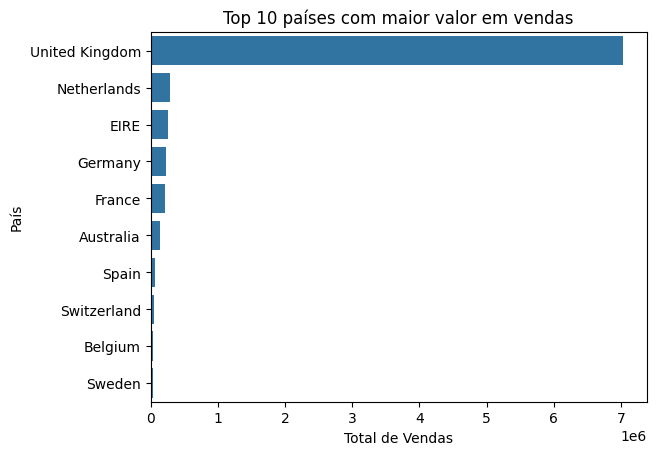

In [24]:
top10_pais_vendas = df_cleaned_filter.groupby('Country')['TotalPrice'].sum().nlargest(10)

sns.barplot(x=top10_pais_vendas.values, y=top10_pais_vendas.index)
plt.xlabel('Total de Vendas')
plt.ylabel('País')
plt.title('Top 10 países com maior valor em vendas')
plt.show()

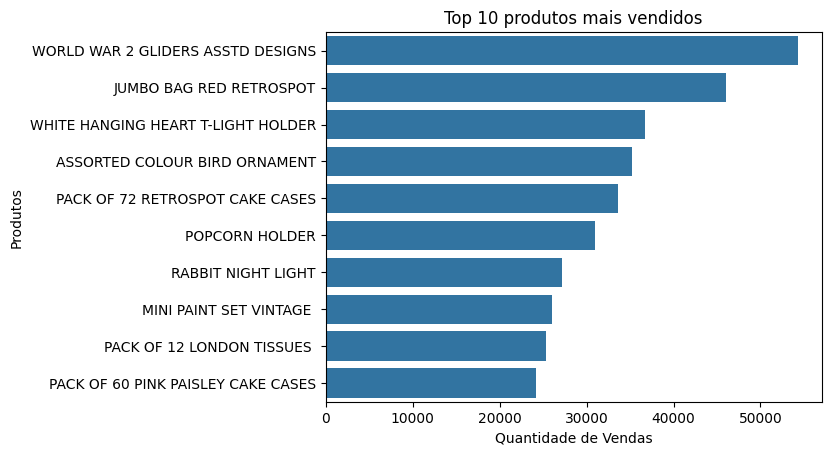

In [25]:
top10_produtos_vendas = df_cleaned_filter.groupby('Description')['Quantity'].sum().nlargest(10)

sns.barplot(x=top10_produtos_vendas.values, y=top10_produtos_vendas.index)
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Produtos')
plt.title('Top 10 produtos mais vendidos')
plt.show()

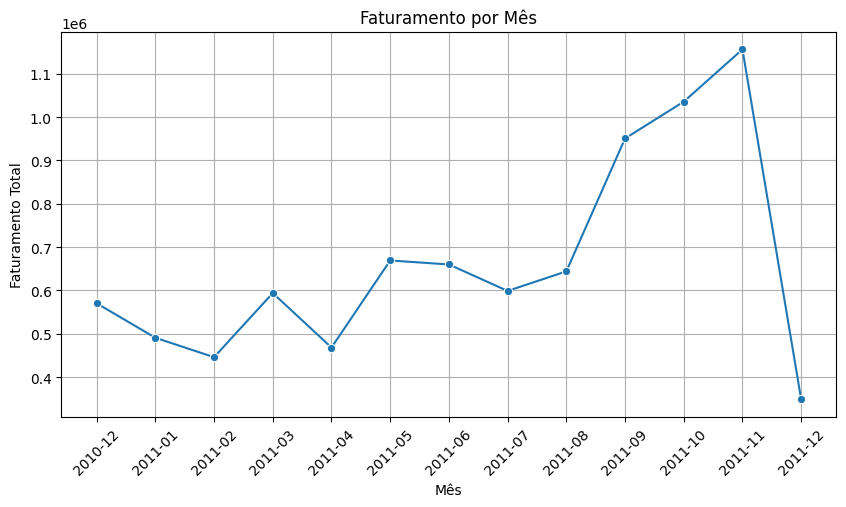

In [26]:
df_cleaned_filter['Month'] = df_cleaned_filter['InvoiceDate'].dt.strftime('%Y-%m')

# Faturamento/mês
sales_per_month = df_cleaned_filter.groupby('Month')['TotalPrice'].sum().reset_index()

sales_per_month = sales_per_month.sort_values('Month')

# Plotar gráfico
plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='TotalPrice', data=sales_per_month, marker='o', linestyle='-')


plt.xticks(rotation=45)  # Rotacionar os meses para melhor leitura
plt.xlabel('Mês')
plt.ylabel('Faturamento Total')
plt.title('Faturamento por Mês')
plt.grid(True)

# 7. Exibir gráfico
plt.show()


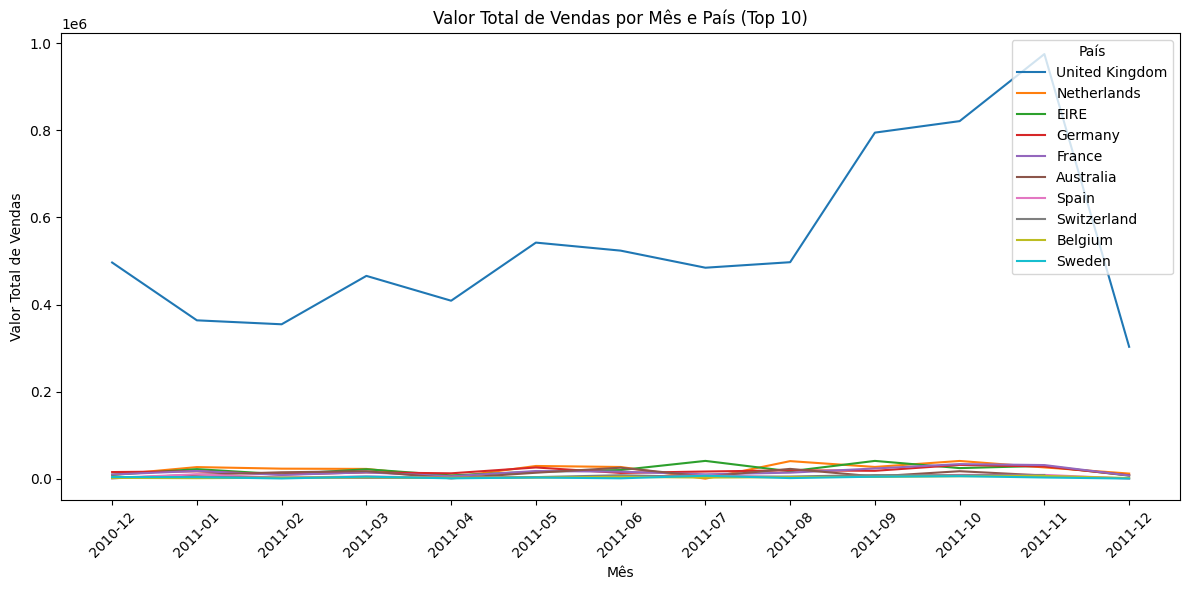

In [27]:
df_cleaned_filter['InvoiceDate'] = pd.to_datetime(df_cleaned_filter['InvoiceDate'])

df_cleaned_filter['Month'] = df_cleaned_filter['InvoiceDate'].dt.to_period('M')

total_sales_by_month_country = df_cleaned_filter.groupby(['Month', 'Country'])['TotalPrice'].sum().reset_index()

top_10_countries = total_sales_by_month_country.groupby('Country')['TotalPrice'].sum().nlargest(10).index

# Filtrar para considerar apenas os top 10 países
top_10_sales = total_sales_by_month_country[total_sales_by_month_country['Country'].isin(top_10_countries)]

# Criar gráfico
plt.figure(figsize=(12, 6))
for country in top_10_countries:
    country_data = top_10_sales[top_10_sales['Country'] == country]
    plt.plot(country_data['Month'].astype(str), country_data['TotalPrice'], label=country)

plt.xticks(rotation=45)
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.title('Valor Total de Vendas por Mês e País (Top 10)')
plt.legend(title='País')
plt.tight_layout()
plt.show()

## 4 - Calculo da Predição

Recomendação: Dados por cliente e pedido/compra (InvoiceNo) e obtenha a data e o preço total do pedido.
Ou seja, importante agrupar novamente apenas por cliente e calcular o RFM, onde:

- R é a recência, diferença em dias da última compra do cliente e da última compra disponível no conjunto de dados, que calcularam previamente.
- F é a frequência, ou seja, a quantidade de compras feitas pelo cliente;
- M é o ticket médio, ou seja, a média das compras feitas pelo cliente.

In [28]:
rfm = df_cleaned_filter.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (data_ultima_compra - x.max()).days),
    Frequency=('InvoiceNo', 'count'),
    Monetary=('TotalPrice', 'mean')
).reset_index()

rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4337.000000,4337.000000,4337.000000,4337.000000
mean,15301.089232,91.529859,90.543924,37.645182
std,1721.422291,99.968030,225.528809,239.369697
min,12347.000000,0.000000,1.000000,1.450000
25%,13814.000000,17.000000,17.000000,12.381951
50%,15300.000000,50.000000,41.000000,17.745568
75%,16779.000000,141.000000,98.000000,24.861000
max,18287.000000,373.000000,7676.000000,13305.500000


### 4.1 - Explicação estatística dos dados obtidos

#### 4.1.1 - Estatísticas Descritivas

count → O conjunto de dados possui 4.337 clientes únicos.

mean → Média dos valores de cada métrica:

Recência média: 91 dias (tempo médio desde a última compra).

Frequência média: 90 compras por cliente.

Ticket médio: R$ 37,65 por cliente.

std → A grande variação no Monetary (239,37) indica que há clientes com valores de compra muito diferentes.


#### 4.1.2 - Mínimos e Quartis

Valores mínimos (clientes menos engajados):

Recência mínima: 0 dias (alguns clientes compraram na última data do dataset).

Frequência mínima: 1 (clientes que compraram apenas uma vez).

Monetary mínimo: R$ 1,45.

Distribuição por quartis:

25% (Q1): 25% dos clientes fizeram no máximo 17 compras e gastaram até R$ 12,38.

50% (Mediana): Metade dos clientes compraram até 41 vezes e gastaram até R$ 17,75.

75% (Q3): 75% dos clientes fizeram até 98 compras e gastaram até R$ 24,86.


#### 4.1.3 - Valores Máximos (clientes VIPs)

Cliente mais ativo: Realizou 7.676 compras! 🏆

Maior valor gasto: R$ 13.305,50! 💰


### 4.2 - Planos de Ação (Conclusão)

#### 4.2.1 - Distribuição Desbalanceada

Alguns clientes compram muito, enquanto outros compram pouco ou raramente.

✅ Soluções:

Criar estratégias personalizadas para cada segmento de clientes.

Implementar segmentação baseada no RFM para personalizar ofertas e comunicação.

Criar programas de fidelidade para incentivar compras mais frequentes.

Lançar campanhas de reativação para clientes que compram pouco, incluindo descontos exclusivos.


#### 4.2.2 - Maximizar o Valor dos Clientes VIPs

Um pequeno grupo de clientes gera grande parte do faturamento.

✅ Soluções:

Fidelizar esse grupo com benefícios exclusivos.

Criar ofertas personalizadas baseadas no histórico de compras.

Implementar programas VIP com vantagens como frete grátis, cashback e atendimento prioritário.


#### 4.2.3 - Aumentar o Ticket Médio

Muitos clientes fazem várias compras, mas gastam pouco por pedido.

✅ Soluções:

Criar descontos progressivos para incentivar compras maiores.

Oferecer pacotes de produtos (exemplo: "Leve 3, pague 2").

Implementar frete grátis acima de um determinado valor de compra.


#### 4.2.4 - Reduzir Clientes com Baixa Frequência

Muitos clientes compram apenas uma vez e não retornam.

✅ Soluções:

Melhorar a experiência do cliente e o relacionamento pós-compra.

Enviar um e-mail de agradecimento e ofertas personalizadas após a primeira compra.

Criar um fluxo automatizado de engajamento nos primeiros 3 meses.

Oferecer garantia de satisfação ou cashback na primeira compra.


#### 4.2.5 - Observações Finais

A maior venda foi feita nos Estados Unidos, em novembro de 2011, atingindo o maior faturamento histórico.

Produto mais vendido: World War 2 Gliders Asstd Designs

Essas estratégias ajudarão a melhorar a retenção de clientes, aumentar o ticket médio e gerar mais receita para o negócio.

